# performance stat

In [1]:
import os
import pandas as pd

df_performance_stat = pd.DataFrame(columns=['total pnl','open times','track days','win','win rate'])
df_perform_dic = {}
names = ['123046.SZ@300587.SZ.csv',
'113642.SH@603185.SH.csv',
'110061.SH@600674.SH.csv',
'128081.SZ@002203.SZ.csv',
'113016.SH@601127.SH.csv',
'128017.SZ@002597.SZ.csv',
'113537.SH@603348.SH.csv',
'123027.SZ@300487.SZ.csv',
'113534.SH@603876.SH.csv',
'113025.SH@601677.SH.csv',
'123031.SZ@300655.SZ.csv',
'128029.SZ@002078.SZ.csv',
'128111.SZ@002738.SZ.csv',#2022-10-14新增4个对子
'128095.SZ@002812.SZ.csv',
'113626.SH@603596.SH.csv',
'123092.SZ@300332.SZ.csv'
]

for name in names:
    folders = os.listdir('./daily_track')
    folders.sort()
    # print('track days: ',len(folders)-1)
    history_performance = []
    track_days = 0
    for folder in folders:
        if folder == '.DS_Store':
            continue
        # print(os.listdir(f'./daily_track/{folder}'))

        if name not in os.listdir(f'./daily_track/{folder}'):
            continue
        track_days += 1
        df_tmp = pd.read_csv(f'./daily_track/{folder}/{name}')
        if len(df_tmp) == 3:
            history_performance.append(df_tmp)
    # print('open by signal times: ',len(history_performance))
    opentimes = len(history_performance)
    if opentimes!=0:
        df_perform = pd.concat(history_performance,axis=0)
        cols = df_perform.columns.to_list()
        cols = ['date'] + cols[1:]
        df_perform.columns = cols
        df_perform_dic[name] = df_perform

        df_perform.loc[2]
        # print(df_perform)
        # print(df_perform.loc[2]['net value'])
        if len(df_perform)==3:
            if df_perform.loc[2]['net value'].tolist()>0:
                wintimes = 1
            else:
                wintimes = 0
        else:
            wintimes =  sum(i>0 for i in df_perform.loc[2]['net value'].tolist()) 
        
        winrates = wintimes/opentimes
        # print(wintimes)
        # assert False
        total_pnl = df_perform.loc[2]['net value'].sum()
        line = [total_pnl,opentimes]
        df_performance_stat.loc[name,'total pnl'] = total_pnl
        df_performance_stat.loc[name,'open times'] = opentimes
        df_performance_stat.loc[name,'track days'] = track_days
        df_performance_stat.loc[name,'win'] = wintimes
        df_performance_stat.loc[name,'win rate'] = winrates
    else:
        df_performance_stat.loc[name,'total pnl'] = 0
        df_performance_stat.loc[name,'open times'] = 0
        df_performance_stat.loc[name,'track days'] = track_days
        df_performance_stat.loc[name,'win'] = 0
        df_performance_stat.loc[name,'win rate'] = 0
# df_performance_stat['track days'] = [len(folders)-1]*len(df_performance_stat)
df_performance_stat = df_performance_stat.reset_index()
df_performance_stat = df_performance_stat.rename(columns={'index':'pair'})
df_performance_stat

,pair,total pnl,open times,track days,win,win rate
0,123046.SZ@300587.SZ.csv,25.538045,29,36,17,0.586207
1,113642.SH@603185.SH.csv,-2.584184,7,36,4,0.571429
2,110061.SH@600674.SH.csv,4.317802,15,36,10,0.666667
3,128081.SZ@002203.SZ.csv,0.73101,15,36,6,0.4
4,113016.SH@601127.SH.csv,0.904555,23,36,13,0.565217
5,128017.SZ@002597.SZ.csv,17.66865,35,36,18,0.514286
6,113537.SH@603348.SH.csv,40.247337,12,36,8,0.666667
7,123027.SZ@300487.SZ.csv,0.14692,1,23,1,1.0
8,113534.SH@603876.SH.csv,8.308479,24,36,14,0.583333
9,113025.SH@601677.SH.csv,-11.382419,26,36,14,0.538462


In [16]:
# pair_name = '123046.SZ@300587.SZ.csv'
# pair_name = '113642.SH@603185.SH.csv'
# pair_name = '110061.SH@600674.SH.csv'
# pair_name = '128081.SZ@002203.SZ.csv'
# pair_name = '113016.SH@601127.SH.csv'
# pair_name = '128017.SZ@002597.SZ.csv'
# pair_name = '113537.SH@603348.SH.csv'
# pair_name = '123027.SZ@300487.SZ.csv'
# pair_name = '113534.SH@603876.SH.csv'
# pair_name = '113025.SH@601677.SH.csv'
pair_name = '123031.SZ@300655.SZ.csv'
# pair_name = '128029.SZ@002078.SZ.csv'
# pair_name = '128111.SZ@002738.SZ.csv'  #2022-10-14新增4个对子
# pair_name = '128095.SZ@002812.SZ.csv'
# pair_name = '113626.SH@603596.SH.csv'
# pair_name = '123092.SZ@300332.SZ.csv'
df_perform_dic[pair_name].loc[2]

,date,pair,cash,signal,bond price,stock price,bond hold,stock hold,commission,tax,reverse open,diff,asset value,net value,open/close
2,2022-09-09 15:00:00,123031.SZ@300655.SZ,2.354944,00,344.006,17.87,0.0,0.0,0.138373,0.000000,False,-0.011008,0.0,2.354944,"0.019,0"
2,2022-09-14 15:00:00,123031.SZ@300655.SZ,-0.438721,0.0,344.789,17.49,0.0,0.0,0.136639,0.338407,False,0.018540,0.0,-0.438721,"0.019,0"
2,2022-09-15 10:35:00,123031.SZ@300655.SZ,6.489647,0.0,333.266,16.91,0.0,0.0,0.133324,0.333355,False,-0.000259,0.0,6.489647,"0.019,0"
2,2022-09-21 15:00:00,123031.SZ@300655.SZ,-10.356951,0.0,339.691,16.40,0.0,0.0,0.132683,0.323723,False,0.049055,0.0,-10.356951,"0.019,0"
2,2022-09-23 15:00:00,123031.SZ@300655.SZ,-9.712928,0.0,331.121,15.30,0.0,0.0,0.129245,0.315103,False,0.047510,0.0,-9.712928,"0.019,0"
2,2022-09-26 15:00:00,123031.SZ@300655.SZ,0.889175,00,327.466,15.39,0.0,0.0,0.132107,0.000000,False,-0.016921,0.0,0.889175,"0.019,0"
2,2022-09-27 15:00:00,123031.SZ@300655.SZ,0.190999,00,332.949,15.91,0.0,0.0,0.134296,0.000000,False,-0.017044,0.0,0.190999,"0.019,0"
2,2022-10-10 15:00:00,123031.SZ@300655.SZ,-2.747316,0.0,305.909,14.12,0.0,0.0,0.120716,0.297670,False,0.026195,0.0,-2.747316,"0.019,0"
2,2022-10-11 15:00:00,123031.SZ@300655.SZ,-3.412716,0.0,310.880,13.88,0.0,0.0,0.122318,0.300709,False,0.033247,0.0,-3.412716,"0.019,0"
2,2022-10-12 13:57:00,123031.SZ@300655.SZ,7.288206,0.0,320.500,14.36,0.0,0.0,0.128426,0.321631,False,-0.003638,0.0,7.288206,"0.019,0"


<AxesSubplot:xlabel='date'>

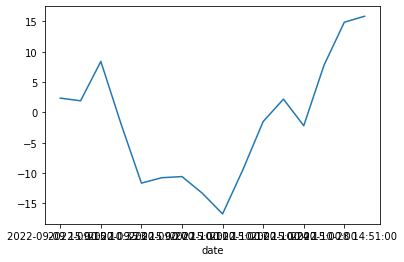

In [22]:
df_perform_dic[pair_name].loc[2].set_index('date')['net value'].cumsum().plot()

# pair info

In [3]:
from WindPy import *
import pandas as pd
#Wind API 使用W账户密码登录
w.start()
#return True and then can go to next operation.
w.isconnected()

22.9.1.52437
Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2021 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

In [4]:
############################################################
# start_date = '20220928'
# end_date = '20220928'
# trade_date = '20220927'
############################################################

############################################################
# start_date = '20220929'
# end_date = '20220929'
# trade_date = '20220928'
############################################################

############################################################
# start_date = '20220930'
# end_date = '20220930'
# trade_date = '20220929'
############################################################

############################################################
# start_date = '20221010'
# end_date = '20221010'
# trade_date = '20220930'
############################################################

############################################################
# start_date = '20221011'
# end_date = '20221011'
# trade_date = '20221010'
############################################################



In [5]:
############################################################
# start_date = '20221014'
# end_date = '20221014'
# trade_date = '20221013'
############################################################

############################################################
# start_date = '20221017'
# end_date = '20221017'
# trade_date = '20221014'
############################################################

############################################################
# start_date = '20221018'
# end_date = '20221018'
# trade_date = '20221017'
############################################################

############################################################
# start_date = '20221020'
# end_date = '20221020' 
# trade_date = '20221019' 
############################################################

############################################################
# start_date = '20221023'
# end_date = '20221025' 
# trade_date = '20221024' 
############################################################

############################################################
# start_date = '20221026'
# end_date = '20221026' 
# trade_date = '20221025' 
############################################################

############################################################
# start_date = '20221027' #交易当天
# end_date = '20221027' #交易当天
# trade_date = '20221026' #交易当天的前一个交易日
############################################################

############################################################
# start_date = '20221028' #交易当天
# end_date = '20221028' #交易当天
# trade_date = '20221027' #交易当天的前一个交易日
############################################################

############################################################
# start_date = '20221103' #交易当天
# end_date = '20221103' #交易当天
# trade_date = '20221102' #交易当天的前一个交易日
############################################################

############################################################
# start_date = '20221104' #交易当天
# end_date = '20221104' #交易当天
# trade_date = '20221103' #交易当天的前一个交易日
############################################################

############################################################
start_date = '20221107' #交易当天
end_date = '20221107' #交易当天
trade_date = '20221104' #交易当天的前一个交易日
############################################################

In [6]:
df_data = w.wss("110038.SH,  110043.SH,  110044.SH,  110045.SH,  110047.SH,  110048.SH,  110052.SH,  110053.SH,  110055.SH,  110056.SH,  110057.SH,  110058.SH,  110059.SH,  110060.SH,  110061.SH,  110062.SH,  110063.SH,  110064.SH,  110067.SH,  110068.SH,  110070.SH,  110072.SH,  110073.SH,  110074.SH,  110075.SH,  110076.SH,  110077.SH,  110079.SH,  110080.SH,  110081.SH,  110082.SH,  110083.SH,  110084.SH,  110085.SH,  110086.SH,  110087.SH,  110088.SH,  110089.SH,  110090.SH,  110801.SH,  110803.SH,  110807.SH,  110808.SH,  110813.SH,  110814.SH,  111000.SH,  111001.SH,  111002.SH,  111003.SH,  111004.SH,  111005.SH,  111006.SH,  113011.SH,  113013.SH,  113016.SH,  113017.SH,  113021.SH,  113024.SH,  113025.SH,  113027.SH,  113030.SH,  113033.SH,  113037.SH,  113039.SH,  113042.SH,  113043.SH,  113044.SH,  113045.SH,  113046.SH,  113047.SH,  113048.SH,  113049.SH,  113050.SH,  113051.SH,  113052.SH,  113053.SH,  113054.SH,  113055.SH,  113056.SH,  113057.SH,  113058.SH,  113059.SH,  113060.SH,  113061.SH,  113062.SH,  113504.SH,  113505.SH,  113516.SH,  113519.SH,  113524.SH,  113525.SH,  113526.SH,  113527.SH,  113530.SH,  113532.SH,  113534.SH,  113535.SH,  113537.SH,  113542.SH,  113545.SH,  113546.SH,  113549.SH,  113561.SH,  113563.SH,  113565.SH,  113566.SH,  113567.SH,  113569.SH,  113570.SH,  113573.SH,  113574.SH,  113575.SH,  113576.SH,  113577.SH,  113578.SH,  113579.SH,  113582.SH,  113584.SH,  113585.SH,  113588.SH,  113589.SH,  113591.SH,  113593.SH,  113594.SH,  113595.SH,  113596.SH,  113597.SH,  113598.SH,  113600.SH,  113601.SH,  113602.SH,  113604.SH,  113605.SH,  113606.SH,  113608.SH,  113609.SH,  113610.SH,  113615.SH,  113616.SH,  113618.SH,  113619.SH,  113621.SH,  113622.SH,  113623.SH,  113624.SH,  113625.SH,  113626.SH,  113627.SH,  113628.SH,  113629.SH,  113631.SH,  113632.SH,  113633.SH,  113634.SH,  113635.SH,  113636.SH,  113637.SH,  113638.SH,  113639.SH,  113640.SH,  113641.SH,  113642.SH,  113643.SH,  113644.SH,  113646.SH,  113647.SH,  113648.SH,  113649.SH,  113650.SH,  113651.SH,  113652.SH,  113653.SH,  113654.SH,  113655.SH,  113656.SH,  113657.SH,  113658.SH,  118000.SH,  118003.SH,  118004.SH,  118005.SH,  118006.SH,  118007.SH,  118008.SH,  118009.SH,  118010.SH,  118011.SH,  118012.SH,  118013.SH,  118014.SH,  118015.SH,  118016.SH,  118017.SH,  118018.SH,  118019.SH,  118020.SH,  118021.SH,  123002.SZ,  123004.SZ,  123010.SZ,  123011.SZ,  123012.SZ,  123013.SZ,  123014.SZ,  123015.SZ,  123018.SZ,  123022.SZ,  123023.SZ,  123025.SZ,  123027.SZ,  123029.SZ,  123031.SZ,  123034.SZ,  123035.SZ,  123038.SZ,  123039.SZ,  123044.SZ,  123046.SZ,  123048.SZ,  123049.SZ,  123050.SZ,  123052.SZ,  123054.SZ,  123056.SZ,  123057.SZ,  123059.SZ,  123060.SZ,  123061.SZ,  123063.SZ,  123064.SZ,  123065.SZ,  123067.SZ,  123071.SZ,  123072.SZ,  123075.SZ,  123076.SZ,  123077.SZ,  123078.SZ,  123080.SZ,  123082.SZ,  123083.SZ,  123085.SZ,  123087.SZ,  123088.SZ,  123089.SZ,  123090.SZ,  123091.SZ,  123092.SZ,  123093.SZ,  123096.SZ,  123098.SZ,  123099.SZ,  123100.SZ,  123101.SZ,  123103.SZ,  123104.SZ,  123105.SZ,  123106.SZ,  123107.SZ,  123108.SZ,  123109.SZ,  123110.SZ,  123112.SZ,  123113.SZ,  123114.SZ,  123115.SZ,  123116.SZ,  123117.SZ,  123118.SZ,  123119.SZ,  123120.SZ,  123121.SZ,  123122.SZ,  123123.SZ,  123124.SZ,  123125.SZ,  123126.SZ,  123127.SZ,  123128.SZ,  123129.SZ,  123130.SZ,  123131.SZ,  123132.SZ,  123133.SZ,  123134.SZ,  123135.SZ,  123136.SZ,  123137.SZ,  123138.SZ,  123139.SZ,  123140.SZ,  123141.SZ,  123142.SZ,  123143.SZ,  123144.SZ,  123145.SZ,  123146.SZ,  123147.SZ,  123148.SZ,  123149.SZ,  123150.SZ,  123151.SZ,  123152.SZ,  123153.SZ,  123154.SZ,  123155.SZ,  123156.SZ,  123157.SZ,  123158.SZ,  123159.SZ,  123160.SZ,  124002.SZ,  124003.SZ,  124006.SZ,  124009.SZ,  124012.SZ,  124014.SZ,  124017.SZ,  124018.SZ,  127004.SZ,  127005.SZ,  127006.SZ,  127007.SZ,  127012.SZ,  127014.SZ,  127015.SZ,  127016.SZ,  127017.SZ,  127018.SZ,  127019.SZ,  127020.SZ,  127021.SZ,  127022.SZ,  127024.SZ,  127025.SZ,  127026.SZ,  127027.SZ,  127028.SZ,  127029.SZ,  127030.SZ,  127031.SZ,  127032.SZ,  127033.SZ,  127034.SZ,  127035.SZ,  127036.SZ,  127037.SZ,  127038.SZ,  127039.SZ,  127040.SZ,  127041.SZ,  127042.SZ,  127043.SZ,  127044.SZ,  127045.SZ,  127046.SZ,  127047.SZ,  127049.SZ,  127050.SZ,  127051.SZ,  127052.SZ,  127053.SZ,  127054.SZ,  127055.SZ,  127056.SZ,  127057.SZ,  127058.SZ,  127059.SZ,  127060.SZ,  127061.SZ,  127062.SZ,  127063.SZ,  127064.SZ,  127065.SZ,  127066.SZ,  127067.SZ,  127068.SZ,  127069.SZ,  127070.SZ,  127071.SZ,  127072.SZ,  127073.SZ,  128014.SZ,  128015.SZ,  128017.SZ,  128021.SZ,  128022.SZ,  128023.SZ,  128025.SZ,  128026.SZ,  128029.SZ,  128030.SZ,  128033.SZ,  128034.SZ,  128035.SZ,  128036.SZ,  128037.SZ,  128039.SZ,  128040.SZ,  128041.SZ,  128042.SZ,  128044.SZ,  128046.SZ,  128048.SZ,  128049.SZ,  128053.SZ,  128056.SZ,  128062.SZ,  128063.SZ,  128066.SZ,  128069.SZ,  128070.SZ,  128071.SZ,  128072.SZ,  128073.SZ,  128074.SZ,  128075.SZ,  128076.SZ,  128078.SZ,  128079.SZ,  128081.SZ,  128082.SZ,  128083.SZ,  128085.SZ,  128087.SZ,  128090.SZ,  128091.SZ,  128095.SZ,  128097.SZ,  128100.SZ,  128101.SZ,  128105.SZ,  128106.SZ,  128108.SZ,  128109.SZ,  128111.SZ,  128114.SZ,  128116.SZ,  128117.SZ,  128118.SZ,  128119.SZ,  128120.SZ,  128121.SZ,  128122.SZ,  128123.SZ,  128124.SZ,  128125.SZ,  128127.SZ,  128128.SZ,  128129.SZ,  128130.SZ,  128131.SZ,  128132.SZ,  128133.SZ,  128134.SZ,  128135.SZ,  128136.SZ,  128137.SZ,  128138.SZ,  128140.SZ,  128141.SZ,  128142.SZ,  128143.SZ,  128144.SZ,  128145.SZ,  810001.NQ", 
"trade_code,  sec_name,  underlyingcode,  underlyingname,  cb_pq_stockpreclose,  convprice,  ptmyear,  convpremiumratio,  outstandingbalance",
 f"startDate={start_date};endDate={end_date};priceAdj=U;tradeDate={trade_date};",usedf=True)[1]
df_data

,TRADE_CODE,SEC_NAME,UNDERLYINGCODE,UNDERLYINGNAME,CB_PQ_STOCKPRECLOSE,CONVPRICE,PTMYEAR,CONVPREMIUMRATIO,OUTSTANDINGBALANCE
110038.SH,110038,济川转债,600566.SH,济川药业,31.51,22.67,0.027397,-0.2326,2.639819
110043.SH,110043,无锡转债,600908.SH,无锡银行,4.94,5.43,1.238356,25.5396,29.213320
110044.SH,110044,广电转债,600831.SH,广电网络,5.36,6.84,1.643836,149.6369,0.707090
110045.SH,110045,海澜转债,600398.SH,海澜之家,4.37,6.53,1.687671,63.4667,29.496060
110047.SH,110047,山鹰转债,600567.SH,山鹰国际,2.39,2.40,2.046575,18.7338,22.461280
...,...,...,...,...,...,...,...,...,...
128142.SZ,128142,新乳转债,002946.SZ,新乳业,11.04,18.40,4.120548,86.1283,7.179784
128143.SZ,128143,锋龙转债,002931.SZ,锋龙股份,10.50,12.63,4.178082,47.7048,2.440944
128144.SZ,128144,利民转债,002734.SZ,利民股份,9.68,11.20,4.320548,39.1090,9.794138
128145.SZ,128145,日丰转债,002953.SZ,日丰股份,11.48,10.43,4.378082,21.5631,3.766970


In [7]:
df_data = df_data.reset_index()

df_data['TRADE_CODE'] =df_data['index']
df_data = df_data.drop(['index'],axis=1)
df_data
df_data.columns = ['bond code','bond name','stock code','stock name',
                    'stock price','convert price','bond life','premium rate','bond balance']
df_data

,bond code,bond name,stock code,stock name,stock price,convert price,bond life,premium rate,bond balance
0,110038.SH,济川转债,600566.SH,济川药业,31.51,22.67,0.027397,-0.2326,2.639819
1,110043.SH,无锡转债,600908.SH,无锡银行,4.94,5.43,1.238356,25.5396,29.213320
2,110044.SH,广电转债,600831.SH,广电网络,5.36,6.84,1.643836,149.6369,0.707090
3,110045.SH,海澜转债,600398.SH,海澜之家,4.37,6.53,1.687671,63.4667,29.496060
4,110047.SH,山鹰转债,600567.SH,山鹰国际,2.39,2.40,2.046575,18.7338,22.461280
...,...,...,...,...,...,...,...,...,...
461,128142.SZ,新乳转债,002946.SZ,新乳业,11.04,18.40,4.120548,86.1283,7.179784
462,128143.SZ,锋龙转债,002931.SZ,锋龙股份,10.50,12.63,4.178082,47.7048,2.440944
463,128144.SZ,利民转债,002734.SZ,利民股份,9.68,11.20,4.320548,39.1090,9.794138
464,128145.SZ,日丰转债,002953.SZ,日丰股份,11.48,10.43,4.378082,21.5631,3.766970


In [8]:
df_data = df_data.dropna(axis=0,how='any')
df_data

,bond code,bond name,stock code,stock name,stock price,convert price,bond life,premium rate,bond balance
0,110038.SH,济川转债,600566.SH,济川药业,31.51,22.67,0.027397,-0.2326,2.639819
1,110043.SH,无锡转债,600908.SH,无锡银行,4.94,5.43,1.238356,25.5396,29.213320
2,110044.SH,广电转债,600831.SH,广电网络,5.36,6.84,1.643836,149.6369,0.707090
3,110045.SH,海澜转债,600398.SH,海澜之家,4.37,6.53,1.687671,63.4667,29.496060
4,110047.SH,山鹰转债,600567.SH,山鹰国际,2.39,2.40,2.046575,18.7338,22.461280
...,...,...,...,...,...,...,...,...,...
460,128141.SZ,旺能转债,002034.SZ,旺能环境,19.49,15.67,4.117808,12.3464,12.701475
461,128142.SZ,新乳转债,002946.SZ,新乳业,11.04,18.40,4.120548,86.1283,7.179784
462,128143.SZ,锋龙转债,002931.SZ,锋龙股份,10.50,12.63,4.178082,47.7048,2.440944
463,128144.SZ,利民转债,002734.SZ,利民股份,9.68,11.20,4.320548,39.1090,9.794138


In [9]:

df_data['moneyness'] = (df_data['stock price'] - df_data['convert price']) /  df_data['stock price']

df_obs_bond = pd.DataFrame([])

obs_bond_list = ['123046.SZ',
'113642.SH',
'110061.SH',
'128081.SZ',
'113016.SH',
'128017.SZ',
'113537.SH',
# '123027.SZ',
'113534.SH',
'113025.SH',
'123031.SZ',
'128029.SZ',
'128111.SZ',#2022-10-14新增4个对子
'128095.SZ',
'113626.SH',
'123092.SZ']

for bond_code in obs_bond_list:

    df_obs_bond = df_obs_bond.append(df_data[df_data['bond code'] == bond_code])

df_obs_bond.index = list(range(len(df_obs_bond)))

/var/folders/4y/tm0f5s2n00s3g71c6qrvd0bh0000gn/T/ipykernel_59841/952841734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['moneyness'] = (df_data['stock price'] - df_data['convert price']) /  df_data['stock price']


In [10]:
df_obs_bond

,bond code,bond name,stock code,stock name,stock price,convert price,bond life,premium rate,bond balance,moneyness
0,123046.SZ,天铁转债,300587.SZ,天铁股份,12.91,3.94,3.369863,20.8765,0.585301,0.694810
1,113642.SH,上22转债,603185.SH,上机数控,140.14,102.40,5.320548,-0.2948,5.806002,0.269302
2,110061.SH,川投转债,600674.SH,川投能源,11.30,8.80,3.019178,1.6782,35.111875,0.221239
3,128081.SZ,海亮转债,002203.SZ,海亮股份,11.74,9.62,3.046575,3.4945,30.054124,0.180579
4,113016.SH,小康转债,601127.SH,赛力斯,57.42,20.17,1.005479,26.3407,2.063650,0.648729
5,128017.SZ,金禾转债,002597.SZ,金禾实业,34.13,21.33,0.991781,17.8681,5.517917,0.375037
6,113537.SH,文灿转债,603348.SH,文灿股份,78.70,19.13,2.597260,6.6856,1.239570,0.756925
7,113534.SH,鼎胜转债,603876.SH,鼎胜新材,57.10,14.98,2.427397,8.1047,3.933370,0.737653
8,113025.SH,明泰转债,601677.SH,明泰铝业,14.94,7.66,2.430137,5.5839,10.147150,0.487282
9,123031.SZ,晶瑞转债,300655.SZ,晶瑞电材,16.97,6.25,2.816438,29.0365,0.529199,0.631703


In [11]:
df_obs_stat =  pd.concat([df_obs_bond,df_performance_stat],axis=1)

df_obs_stat.drop(['pair'],axis=1)

,bond code,bond name,stock code,stock name,stock price,convert price,bond life,premium rate,bond balance,moneyness,total pnl,open times,track days,win,win rate
0,123046.SZ,天铁转债,300587.SZ,天铁股份,12.91,3.94,3.369863,20.8765,0.585301,0.694810,25.538045,29,36,17,0.586207
1,113642.SH,上22转债,603185.SH,上机数控,140.14,102.40,5.320548,-0.2948,5.806002,0.269302,-2.584184,7,36,4,0.571429
2,110061.SH,川投转债,600674.SH,川投能源,11.30,8.80,3.019178,1.6782,35.111875,0.221239,4.317802,15,36,10,0.666667
3,128081.SZ,海亮转债,002203.SZ,海亮股份,11.74,9.62,3.046575,3.4945,30.054124,0.180579,0.73101,15,36,6,0.4
4,113016.SH,小康转债,601127.SH,赛力斯,57.42,20.17,1.005479,26.3407,2.063650,0.648729,0.904555,23,36,13,0.565217
5,128017.SZ,金禾转债,002597.SZ,金禾实业,34.13,21.33,0.991781,17.8681,5.517917,0.375037,17.66865,35,36,18,0.514286
6,113537.SH,文灿转债,603348.SH,文灿股份,78.70,19.13,2.597260,6.6856,1.239570,0.756925,40.247337,12,36,8,0.666667
7,113534.SH,鼎胜转债,603876.SH,鼎胜新材,57.10,14.98,2.427397,8.1047,3.933370,0.737653,0.14692,1,23,1,1.0
8,113025.SH,明泰转债,601677.SH,明泰铝业,14.94,7.66,2.430137,5.5839,10.147150,0.487282,8.308479,24,36,14,0.583333
9,123031.SZ,晶瑞转债,300655.SZ,晶瑞电材,16.97,6.25,2.816438,29.0365,0.529199,0.631703,-11.382419,26,36,14,0.538462


In [12]:
# df_obs_stat.drop(['pair'],axis=1).T.to_excel('operate.xlsx')

# output to excel

In [15]:
df_obs_stat.drop(['pair'],axis=1).to_excel('./daily_cum_performance_stat.xlsx')